In [189]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Section 1: Fundamentals of Risk & Returns**

In [191]:
prices_a = np.array([8.7, 8.9, 8.71])

In [192]:
prices_a[1:]

array([8.9 , 8.71])

In [193]:
prices_a[:-1]

array([8.7, 8.9])

In [194]:
prices_a[1:]/prices_a[:-1] -1

array([ 0.02298851, -0.02134831])

In [195]:
prices = pd.DataFrame({
    'Blue' : [8.7, 8.91, 9.1, 9.23, 9.1],
    'Orange': [10.2, 10.34, 10.22, 9.98, 10.1]
})

In [196]:
prices

,Blue,Orange
0,8.70,10.20
1,8.91,10.34
2,9.10,10.22
3,9.23,9.98
4,9.10,10.10


In [197]:
prices.iloc[1:]

,Blue,Orange
1,8.91,10.34
2,9.10,10.22
3,9.23,9.98
4,9.10,10.10


In [198]:
prices.iloc[:-1]

,Blue,Orange
0,8.70,10.20
1,8.91,10.34
2,9.10,10.22
3,9.23,9.98


In [199]:
prices.iloc[1:].values/prices.iloc[:-1]-1

,Blue,Orange
0,0.024138,0.013725
1,0.021324,-0.011605
2,0.014286,-0.023483
3,-0.014085,0.012024


In [200]:
#alternative method 1
prices/prices.shift(1)-1

,Blue,Orange
0,NaN,NaN
1,0.024138,0.013725
2,0.021324,-0.011605
3,0.014286,-0.023483
4,-0.014085,0.012024


In [201]:
# alternative method 2 (by methods)
returns = prices.pct_change()
returns

,Blue,Orange
0,NaN,NaN
1,0.024138,0.013725
2,0.021324,-0.011605
3,0.014286,-0.023483
4,-0.014085,0.012024


In [202]:
returns+1

,Blue,Orange
0,NaN,NaN
1,1.024138,1.013725
2,1.021324,0.988395
3,1.014286,0.976517
4,0.985915,1.012024


In [203]:
#compounding return calculation
#copounding row by row - method 1
np.prod(returns+1) -1

Blue      0.045977
Orange   -0.009804
dtype: float64

In [204]:
#method 2
(((returns+1).prod()-1)*100).round(2)

Blue      4.60
Orange   -0.98
dtype: float64

**Annualization Calculation**

In [205]:
rm = 0.01
(1+rm)**12 -1

0.12682503013196977

**Measuring Risk & Reward** <br>
Sharpe Ratio = (Returns - Risk Free Rate)/Volatility

In [206]:
returns.dropna()

,Blue,Orange
1,0.024138,0.013725
2,0.021324,-0.011605
3,0.014286,-0.023483
4,-0.014085,0.012024


In [207]:
#caluclating volatility
deviations = returns - returns.mean()
squared_deviations = deviations**2
num_of_obv = returns.shape[0]
variance = squared_deviations.sum()/(num_of_obv -1)
volatility = variance**0.5

In [208]:
volatility

Blue      0.015154
Orange    0.015790
dtype: float64

In [209]:
# Annualized voliatility - times sqrt of 12
returns.std()*np.sqrt(12)

Blue      0.060615
Orange    0.063161
dtype: float64

In [210]:
returns.std()*(12**0.5)

Blue      0.060615
Orange    0.063161
dtype: float64

**Measuring Draw Downs** <br>

1) Compute wealth index <br>
2) Compute previous peaks <br>
3) Compute drawdown - wealth value as a % of previous peak

In [211]:
path = '/content/drive/MyDrive/Colab Notebooks/Coursera - EDHEC - Intro to Portfolio Construction with Python/Portfolios_Formed_on_ME_monthly_EW.csv'
me_m = pd.read_csv(path, header=0, index_col=0, parse_dates=True, na_values=-99.99)

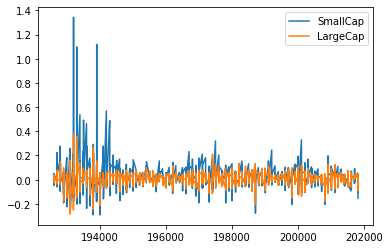

In [212]:
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [213]:
rets.index = pd.to_datetime(rets.index, format='%Y%m' )
rets.index = rets.index.to_period('M') #change to month based 

In [214]:
#extract fractions of time series
rets['1980'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,SmallCap,LargeCap
1980-01,0.1321,0.0483
1980-02,0.0050,-0.0171
1980-03,-0.1751,-0.0748
1980-04,0.0399,0.0458
1980-05,0.0645,0.0647


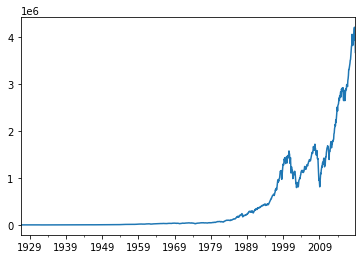

In [215]:
# wealth index = value of portfolio as it compounds over time
wealth_index = 1000*(1+rets['LargeCap']).cumprod()
wealth_index.plot.line()

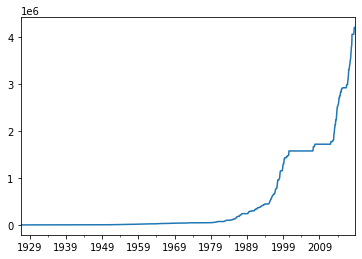

In [216]:
previous_peak = wealth_index.cummax()
previous_peak.plot.line()

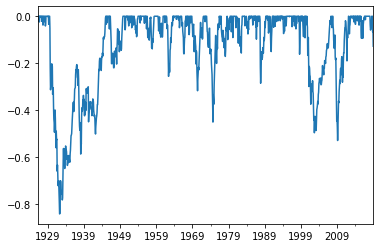

In [217]:
draw_down = (wealth_index - previous_peak)/ previous_peak
draw_down.plot.line()

In [218]:
#find maximum drawdown
draw_down['1975':].min()

-0.5280945042309304

In [219]:
#find period of max drawdown
print(draw_down['1975':].idxmin(), draw_down.idxmin())

2009-02 1932-05


In [220]:
def get_ffme_returns():
  me_m = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursera - EDHEC - Intro to Portfolio Construction with Python/Portfolios_Formed_on_ME_monthly_EW.csv',
                     header=0, index_col=0, parse_dates=True, na_values=-99.99)
  rets = me_m[['Lo 10', 'Hi 10']]
  rets.columns = ['SmallCap', 'LargeCap']
  rets = rets/100
  rets.index = pd.to_datetime(rets.index, format='%Y%m' )
  rets.index = rets.index.to_period('M') 
  return rets

In [221]:
def drawdown(return_series: pd.Series):  
  # Take time series of asset, computes df for wealth index & prev peaks
  wealth_index = 1000*(1+return_series).cumprod()
  previous_peak = wealth_index.cummax()
  draw_down = (wealth_index - previous_peak)/ previous_peak
  return pd.DataFrame({
      "Wealth"  : wealth_index,
      "Peaks"   : previous_peak,
      "Drawdowns": draw_down
  })

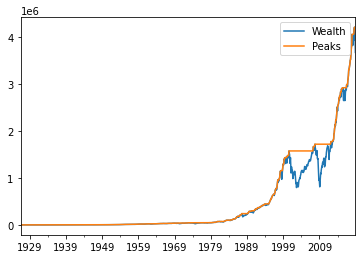

In [222]:
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot.line()

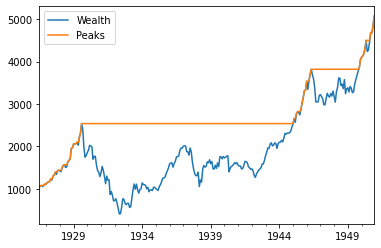

In [223]:
#selecting time period
drawdown(rets[:'1950']['LargeCap'])[['Wealth', 'Peaks']].plot.line()

# **Section 2: Extreme Risk Estimates**

working with and importing modules. First create function/ scripts in .py and upload into the directory. Then use import sys to provide access.

In [224]:
import sys
import os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Coursera - EDHEC - Intro to Portfolio Construction with Python/')

In [225]:
import edhec_risk_kit as erk

%load_ext autoreload
returns = erk.get_ffme_returns()
returns.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [226]:
erk.drawdown(returns['SmallCap'])['Drawdowns'].min()

-0.8330007793945303

**Deviations from Normality**

In [227]:
%load_ext autoreload
% autoreload 2

import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [228]:
def get_hfi_returns():  
  # load EDHEC Hedge fund index returns
  hfi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursera - EDHEC - Intro to Portfolio Construction with Python/edhec-hedgefundindices.csv',
                     header=0, index_col=0, parse_dates=True)
  hfi = hfi/ 100
  hfi.index = hfi.index.to_period('M') 
  return hfi

In [229]:
hfi = erk.get_hfi_returns()
hfi.head(3)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077


In [230]:
# skewness --> mean < median = negatively skewed
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis='columns')

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [231]:
def skewness(r):
  demeaned_r = r - r.mean()
  # user population standard deviation, set ddof=0
  sigma_r = r.std(ddof=0)
  exp = (demeaned_r**3).mean()
  return exp/sigma_r**3

In [232]:
erk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [233]:
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [234]:
hfi.shape

(263, 13)

In [235]:
# generating random number, can use size (rows, column)
normal_rets = np.random.normal(0, 0.15, size=(26300,1))

In [236]:
erk.skewness(normal_rets)

-0.019358651454594318

**Kurtosis**

In [237]:
def kurtosis(r):
  # alternative to scipy.stats.kurtosis()
  demeaned_r = r - r.mean()
  # user population standard deviation, set ddof=0
  sigma_r = r.std(ddof=0)
  exp = (demeaned_r**4).mean()
  return exp/sigma_r**4

In [238]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [239]:
# scipy.stats kurtosis, gives you only excess kurtosis
scipy.stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

In [240]:
def is_normal(r, level=0.01):
 """ Applies Jarque_bera test to determine if a seris is normally distributed, return true if normal
 level set = 1% of confidence the distribution is normal """
 statistics, p_value = scipy.stats.jarque_bera(r)
 return p_value > level

In [241]:
erk.is_normal(hfi)

False

In [242]:
#pandas function aggregate, take the function on every column and give the result
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [243]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [244]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [245]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

**Downside/ Estimating VaR (Volatility)**

In [246]:
hfi = erk.get_hfi_returns()

In [247]:
def semideviation(r):
  #returns semideviation/ -ve semideviation of r
  is_negative = r < 0
  return r[is_negative].std(ddof=0)

In [248]:
# semideviation
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [249]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

**VaR/ CVar - Value At Risk**<br>
1) Historical VaR <br>
2) Parametic VaR - Gaussian <br>
3) Modified Cornish-Fischer VaR

In [250]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [251]:
def var_historic(r, level=5):
  # Returns historic VaR at a specific level, level % of the return fall below that number 
  if isinstance(r, pd.DataFrame):
    return r.aggregate(var_historic, level=level)
  elif isinstance(r, pd.Series):
    return -np.percentile(r, level)
  else:
    raise TypeError('Expected r to be Series/ DataFrame')

In [252]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [253]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [254]:
from scipy.stats import norm

In [255]:
z = norm.ppf(.05)
print(z)

-1.6448536269514729


In [256]:
# VaR at 5% level
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [257]:
def var_gaussian(r, level=5, modified=False):
  # Return gaussian VAR or Cornish-Fischer of series or dataframe
  # compute z score assuming gausian first
  z = norm.ppf(level/100)
  if modified:
    # modified the z score based on skewness and kurtosis
    s = skewness(r)
    k = kurtosis(r)
    z = z + (
        (z**2 - 1)*s/6 +
        (z**3 - 3*z)*(k-3)/24 -
        (2*z**3 - 5*z)*(s**2)/36
    )
  return -(r.mean() + z*r.std(ddof=0))

In [258]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

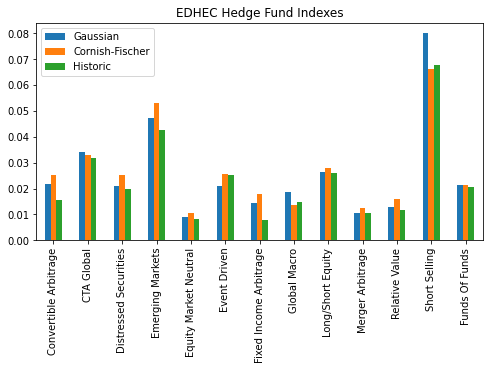

In [259]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Gaussian', 'Cornish-Fischer', 'Historic']
comparison.plot.bar(title = 'EDHEC Hedge Fund Indexes', figsize =(8, 4))

In [260]:
#CVaR - average of all those returns which is worser than VaR
def cvar_historic(r, level=5):
  # calculate conditional var/ CVar or series/ dataframe
  if isinstance(r, pd.Series):
    is_beyond = r <= -var_historic(r, level=level)
    return -r[is_beyond].mean()
  elif isinstance(r, pd.DataFrame):
    return r.aggregate(cvar_historic, level=level)
  else:
    raise TypeError('Expected r to be Series/ DataFrame')

In [262]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64